In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data=pd.read_csv("v.csv")

In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,989,989,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,399,400,400,410,410,411,413,414,414,418
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,294,294,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


In [15]:
tlist=[]
for i in range(4,len(ts)):
    tlist.append(ts[i])
print tlist

[1, 1, 2, 2, 5, 5, 5, 5, 5, 7, 8, 8, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 15, 15, 15, 15, 15, 15, 15, 15, 35, 35, 35, 53, 53, 59, 60, 62, 70, 76, 101, 122, 153]


In [18]:
npar=np.zeros(len(tlist))
for i in range(len(tlist)):
    npar[i]=math.log(tlist[i])
print npar

[0.         0.         0.69314718 0.69314718 1.60943791 1.60943791
 1.60943791 1.60943791 1.60943791 1.94591015 2.07944154 2.07944154
 2.39789527 2.39789527 2.48490665 2.48490665 2.48490665 2.48490665
 2.48490665 2.48490665 2.56494936 2.56494936 2.7080502  2.7080502
 2.7080502  2.7080502  2.7080502  2.7080502  2.7080502  2.7080502
 3.55534806 3.55534806 3.55534806 3.97029191 3.97029191 4.07753744
 4.09434456 4.12713439 4.24849524 4.33073334 4.61512052 4.80402104
 5.03043792]


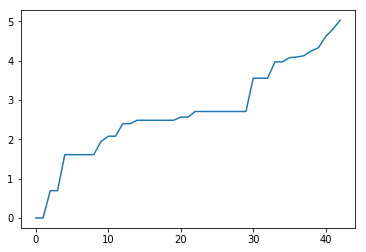

In [19]:
plt.plot(npar)
plt.show()

In [27]:
date=np.array(range(len(npar)))
m,p=np.polyfit(date,npar,1)
print m,p

0.0911706107247442 0.7824464862180224


/Users/watashi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


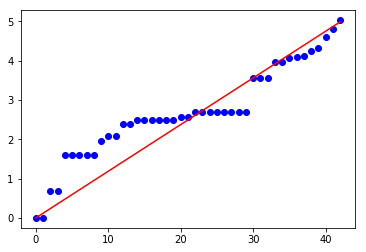

In [28]:
date = date[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(date, npar)

plt.plot(date, npar, 'bo')
plt.plot(date, a*date, 'r-')
plt.show()

In [40]:
flp=[]
flx=[]
for i in range(10000):
    if math.exp(a*i)>3.3*10**8/2:
        print i
        break
    flp.append(math.exp(a*i))
    flx.append(i)

160


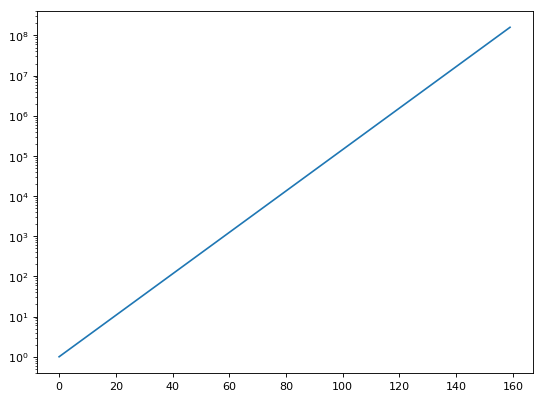

In [39]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(flx,flp)
plt.yscale('log')
plt.show()